In [10]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


## line plots

In [11]:
generation = np.linspace(0, 30, 31)


In [12]:
# function
def line_plot(generation, mean, std, best, best_std):
    fig = plt.figure(figsize=(12, 10))
    
    method = ['Gen', 'SS']
    enemy = [1, 2, 3]
    
    for i in range(len(mean)):
        ax = fig.add_subplot(2, 3, i+1,) 
    
        ax.plot(generation, mean[i], 'b', label='mean')
        ax.plot(generation, best[i], 'r', label='best')
    
        ax.fill_between(generation, mean[i]-std[i], mean[i]+std[i], color='blue', alpha=0.2, label='sigma_mean')
        ax.fill_between(generation, mean[i]-2*std[i], mean[i]+2*std[i], color='blue', alpha=0.1, label='2x sigma_mean')
        
        ax.fill_between(generation, best[i]-best_std[i], best[i]+best_std[i], color='red', alpha=0.2, label='sigma_best')  
        ax.fill_between(generation, best[i]-2*best_std[i], best[i]+2*best_std[i], color='red', alpha=0.1, label='2x sigma_best')
        
        
        ax.set_ylim(0, 100)

        ax.set_xlabel('Generation')
        ax.set_ylabel('Fitness')
        
        
        method_idx, enemy_idx = divmod(i, len(enemy))
        ax.set_title(f'{method[method_idx]}, Enemy: {enemy[enemy_idx]}')
                    
        ax.legend()
    
    plt.tight_layout()

In [13]:
data_ss = [np.loadtxt(f'steady_state_e{i}/results.txt') for i in range(1, 4)]
data_gen = [np.loadtxt(f'generational_e{i}/results.txt') for i in range(1, 4)]

mean_ss = np.zeros((3, 31))
std_ss = np.zeros((3, 31))
best_ss = np.zeros((3, 31))
best_std_ss = np.zeros((3, 31))

mean_gen = np.zeros((3, 31))
std_gen = np.zeros((3, 31))
best_gen = np.zeros((3, 31))
best_std_gen = np.zeros((3, 31))


for i in range(3):
    data_s = data_ss[i]
    data_g = data_gen[i]
    
    for gen in range(31):
        gen_data_ss = data_s[:, 0] == gen
        gen_data_gen = data_g[:, 0] == gen
        
        mean_ss[i, gen] = np.mean(data_s[gen_data_ss, 2])
        std_ss[i, gen] = np.mean(data_s[gen_data_ss, 3])
        best_ss[i, gen] = np.mean(data_s[gen_data_ss, 1])
        best_std_ss[i, gen] = np.std(data_s[gen_data_ss, 1])
        
        mean_gen[i, gen] = np.mean(data_g[gen_data_gen, 2])
        std_gen[i, gen] = np.mean(data_g[gen_data_gen, 3])
        best_gen[i, gen] = np.mean(data_g[gen_data_gen, 1])
        best_std_gen[i, gen] = np.std(data_g[gen_data_gen, 1])
        
        
mean = np.vstack([mean_gen, mean_ss])
std = np.vstack([std_gen, std_ss])
best = np.vstack([best_gen, best_ss])
best_std = np.vstack([best_std_gen, best_std_ss])


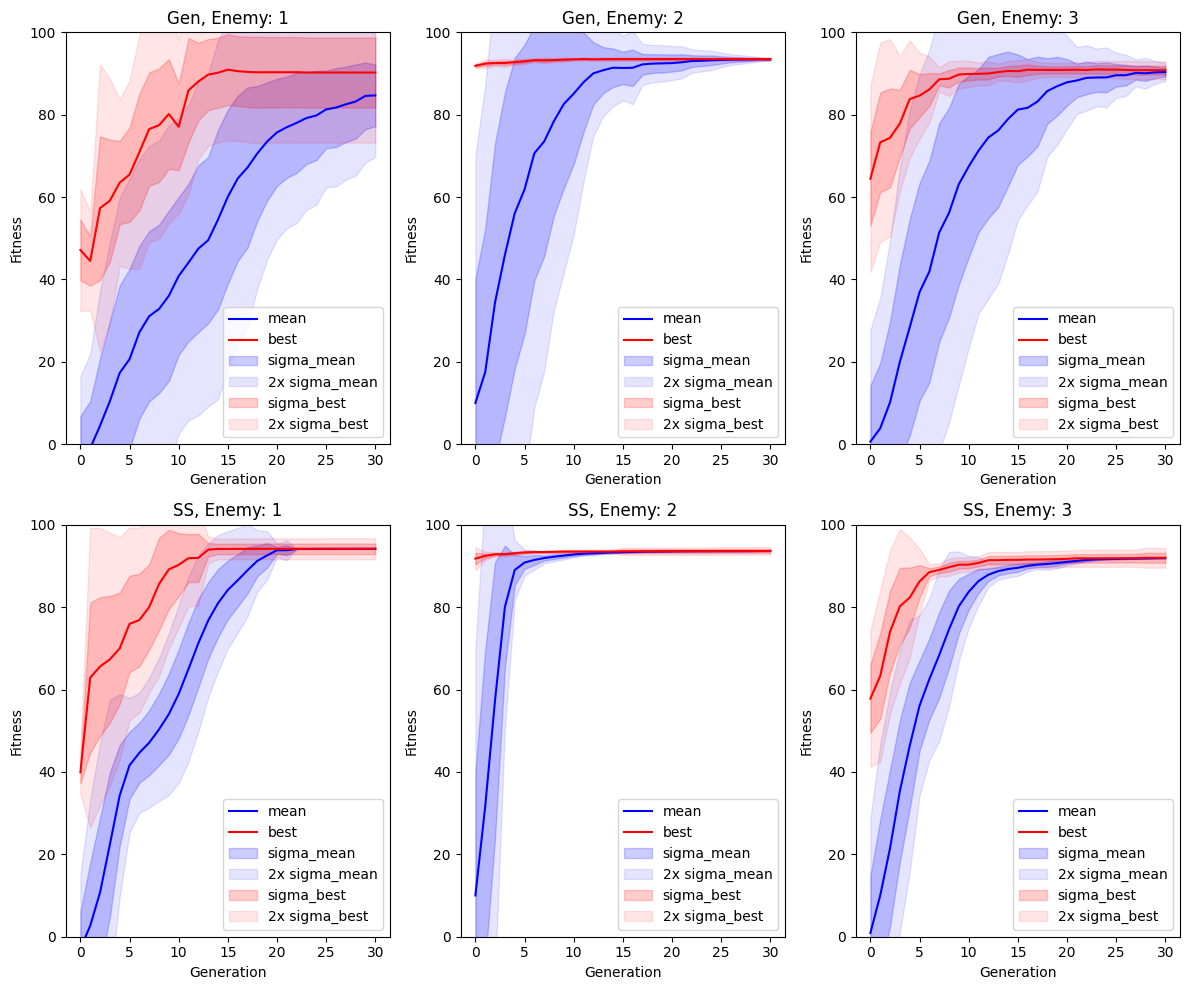

In [14]:
line_plot(generation, mean, std, best, best_std)

## boxplots

In [15]:
# generate example gain
gain_ss = [np.loadtxt(f'gain_ss_e{i}.txt') for i in range(1, 4)]
gain_gen = [np.loadtxt(f'gain_gen_e{i}.txt') for i in range(1, 4)]

gain = np.vstack([gain_gen, gain_ss])

In [16]:
# boxplot funtion
def boxplot(gain):
    plt.boxplot(gain.T)
    plt.title('Gain distribution per algoritm, per enemy')
    plt.xticks([1, 2, 3, 4, 5, 6], ['Gen 1', 'Gen 2', 'Gen 3', 'SS 1', 'SS 2', 'SS 3'])
    plt.ylabel('Gain');

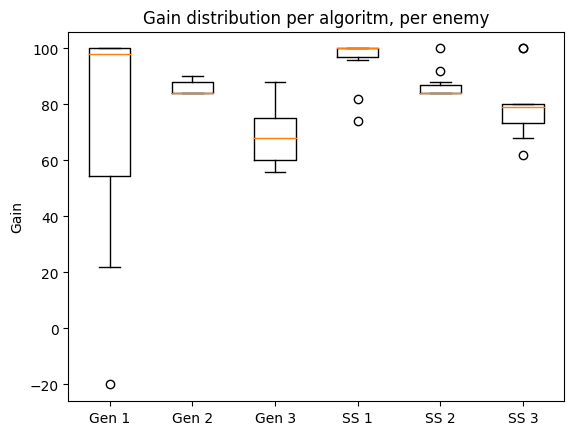

In [17]:
boxplot(gain)

In [18]:
alpha = 0.05

t_statistic, p_values = stats.ttest_ind(gain_ss, gain_gen)

In [19]:
# Here we see if we reject the null hypothesis
if np.any(p_values < alpha):
    print("reject null hyp")
else:
    print("Fail to reject null hypothesis")


Fail to reject null hypothesis
